In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tabpfn
!pip  install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import pandas as pd
index_columns = ["Unit", "Cycle"]
settings_columns = ["setting" + str(i + 1) for i in range(3)]
sensor_columns = ["s" + str(i + 1) for i in range(21)]
final_columns = index_columns + settings_columns + sensor_columns
df_spark = pd.read_csv('/content/drive/MyDrive/CMAPSSData/CMAPSSData/train_FD002.txt', header=None, sep=" ")
df_spark = df_spark[df_spark.columns[0:26]]
df_spark.columns = final_columns
df_spark

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [ ]:
df_spark.columns

Index(['Unit', 'Cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [ ]:
!pip install -U pytorch_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=875a63f8aff546935163db24e2b84f9f001dc48824898c8cbea1952eae3a7532
  Stored in directory: /root/.cache/pip/whee

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import (
    CategoryEmbeddingModelConfig,
    FTTransformerConfig,
    TabNetModelConfig,
    GatedAdditiveTreeEnsembleConfig,
    TabTransformerConfig,
    AutoIntConfig
)
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
cat_cols = []
num_cols = ['Unit','Cycle','setting1','setting2','setting3','s1', 's2', 's3', 's4', 's5', 's6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
target = ['RUL']

In [ ]:
train, test = train_test_split(df_spark, stratify=df_spark['s1'], test_size=0.2, random_state=42)

In [ ]:
train.shape, test.shape

((43007, 26), (10752, 26))

In [ ]:
train

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
40192,194,119,35.0026,0.8406,100.0,449.44,556.35,1367.65,1133.60,5.48,...,182.72,2387.71,8048.46,9.3976,0.02,334,2223,100.00,14.86,8.8031
51144,249,58,34.9998,0.8400,100.0,449.44,555.55,1358.81,1124.97,5.48,...,183.19,2387.99,8066.54,9.2911,0.02,333,2223,100.00,15.04,9.0177
46907,228,188,35.0067,0.8406,100.0,449.44,556.27,1367.92,1131.97,5.48,...,183.04,2388.18,8067.87,9.3143,0.02,334,2223,100.00,15.05,8.7817
32949,158,133,42.0078,0.8411,100.0,445.00,549.54,1347.83,1125.60,3.91,...,130.71,2387.87,8084.54,9.3484,0.02,330,2212,100.00,10.47,6.3384
52549,255,267,9.9994,0.2500,100.0,489.05,604.91,1510.59,1311.45,10.52,...,371.80,2388.23,8135.35,8.6800,0.03,371,2319,100.00,28.43,17.0462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26091,127,177,42.0015,0.8400,100.0,445.00,549.38,1349.87,1124.84,3.91,...,130.54,2387.78,8077.53,9.3791,0.02,331,2212,100.00,10.62,6.2766
7715,39,133,25.0046,0.6216,60.0,462.54,536.98,1270.36,1051.70,7.05,...,164.50,2028.19,7873.56,10.8760,0.02,307,1915,84.93,14.23,8.5494
48183,235,105,41.9984,0.8400,100.0,445.00,549.83,1351.45,1130.56,3.91,...,130.58,2388.05,8084.70,9.3836,0.02,331,2212,100.00,10.46,6.4335
38506,185,95,42.0008,0.8400,100.0,445.00,549.96,1361.84,1132.92,3.91,...,130.39,2388.01,8088.45,9.3685,0.02,332,2212,100.00,10.63,6.4160


In [ ]:
!pip install tabpfn
!pip install shap
!pip install -U pytorch_tabular

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder
import pickle
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

df_spark = pd.read_csv('/content/drive/MyDrive/CMAPSSData/CMAPSSData/train_FD002.txt', sep=' ', header=None)

column_names = ['unit', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 24)]
df_spark.columns = column_names

max_cycle = df_spark.groupby('unit')['cycle'].max()
df_spark['RUL'] = df_spark.apply(lambda row: max_cycle[row['unit']] - row['cycle'], axis=1)

print(df_spark.head())

features = df_spark.columns.difference(['unit', 'cycle', 'RUL'])
target = ['RUL']

train, test = train_test_split(df_spark, test_size=0.2, random_state=42)

cat_cols = ['unit']
train_enc = train.copy()
test_enc = test.copy()

for col in cat_cols:
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
    train_enc[col] = enc.fit_transform(train_enc[col].values.reshape(-1,1))
    test_enc[col] = enc.transform(test_enc[col].values.reshape(-1,1))


model = LGBMRegressor(random_state=42)
model.fit(train_enc[features], train_enc[target[0]])

test_pred = model.predict(test_enc[features])

mse = np.mean((test_enc[target[0]].values - test_pred) ** 2)
print(f"Mean Squared Error: {mse}")

with open('/content/drive/MyDrive/CMAPSSData/CMAPSSData/lgbm_cmapss.sav', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('/content/drive/MyDrive/CMAPSSData/CMAPSSData/lgbm_cmapss.sav', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

   unit  cycle  setting1  setting2  setting3  sensor1  sensor2  sensor3  \
0     1      1   34.9983    0.8400     100.0   449.44   555.32  1358.61   
1     1      2   41.9982    0.8408     100.0   445.00   549.90  1353.22   
2     1      3   24.9988    0.6218      60.0   462.54   537.31  1256.76   
3     1      4   42.0077    0.8416     100.0   445.00   549.51  1354.03   
4     1      5   25.0005    0.6203      60.0   462.54   537.07  1257.71   

   sensor4  sensor5  ...  sensor15  sensor16  sensor17  sensor18  sensor19  \
0  1137.23     5.48  ...    9.3461      0.02       334      2223    100.00   
1  1125.78     3.91  ...    9.3774      0.02       330      2212    100.00   
2  1047.45     7.05  ...   10.8941      0.02       309      1915     84.93   
3  1126.38     3.91  ...    9.3528      0.02       329      2212    100.00   
4  1047.93     7.05  ...   10.8963      0.02       309      1915     84.93   

   sensor20  sensor21  sensor22  sensor23    RUL  
0     14.73    8.8071       N

Mean Squared Error (MSE): 1860.6484688168725
Root Mean Squared Error (RMSE): 43.13523465586889
Mean Absolute Error (MAE): 31.771797073905915
   Actual RUL  Predicted RUL
0       191.0     166.081469
1       250.0     136.806748
2        49.0      47.871315
3        25.0      34.931131
4       108.0     120.253168
5        97.0      66.913105
6        95.0      55.661367
7         2.0      11.341045
8       115.0     144.021774
9        40.0      27.507488


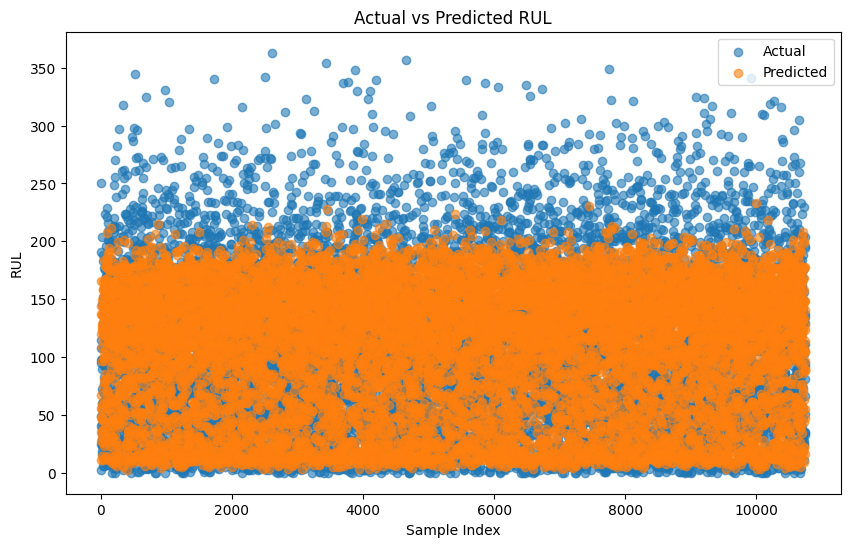

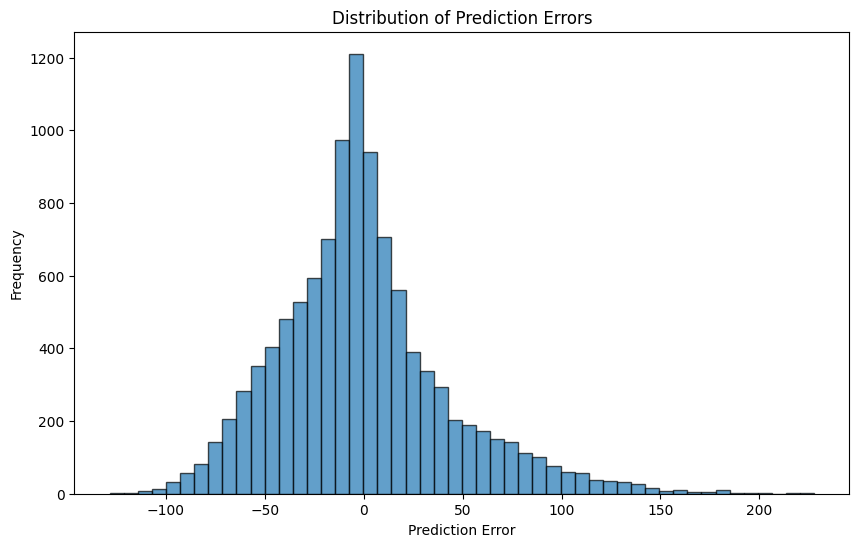

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_pred = loaded_model.predict(test_enc[features])

mse = mean_squared_error(test_enc[target[0]], test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_enc[target[0]], test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

comparison_df = pd.DataFrame({
    'Actual RUL': test_enc[target[0]].values,
    'Predicted RUL': test_pred
})

print(comparison_df.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_enc)), test_enc[target[0]], label='Actual', alpha=0.6)
plt.scatter(range(len(test_enc)), test_pred, label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
errors = test_enc[target[0]].values - test_pred
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

max_cycles = df_spark.groupby('unit')['cycle'].max()
df_spark['RUL'] = df_spark.apply(lambda row: max_cycles[row['unit']] - row['cycle'], axis=1)

train, test = train_test_split(df_spark, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.iloc[:, 2:25])
test_scaled = scaler.transform(test.iloc[:, 2:25])

X_train, y_train = train_scaled, train['RUL']
X_test, y_test = test_scaled, test['RUL']

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3506
[LightGBM] [Info] Number of data points in the train set: 43007, number of used features: 23
[LightGBM] [Info] Start training from score 108.245262
Mean Squared Error: 1860.13


 99%|===================| 10676/10752 [00:56<00:00]       

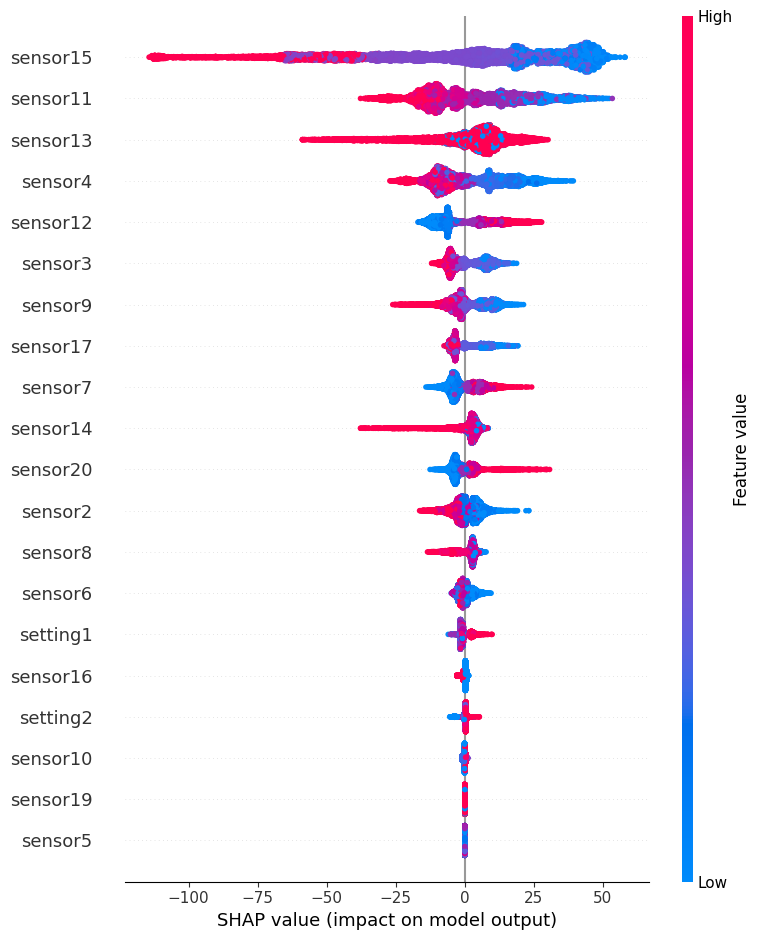

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test, feature_names=column_names[2:25])